In [1]:
%matplotlib inline

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression

# Regression models

## Linear regression

In [3]:
x = np.linspace(-3, 5, 10)
y = 2 * x + 3
y_noise = np.random.normal(loc=0, scale=1, size=len(x)) # y
y += y_noise

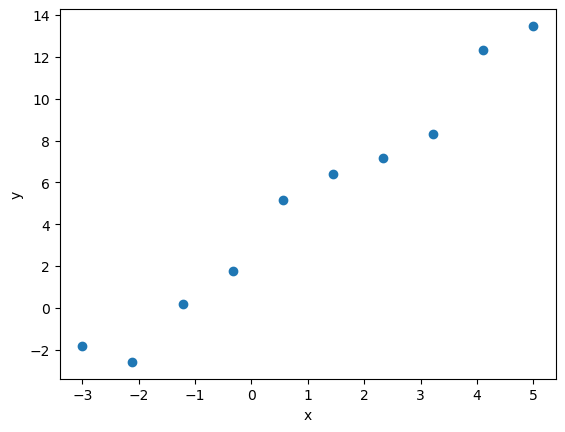

In [4]:
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

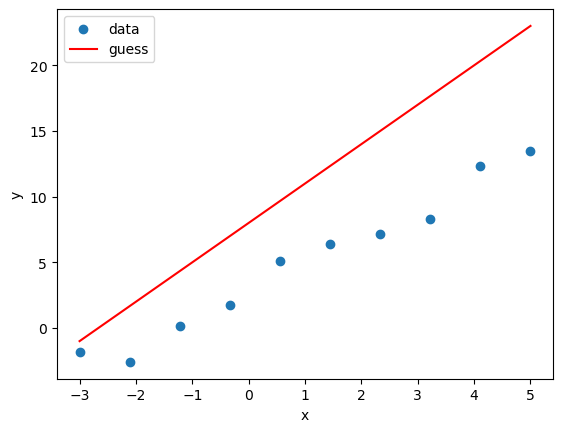

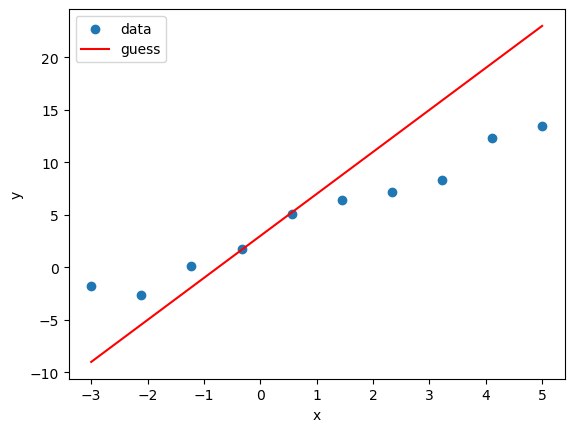

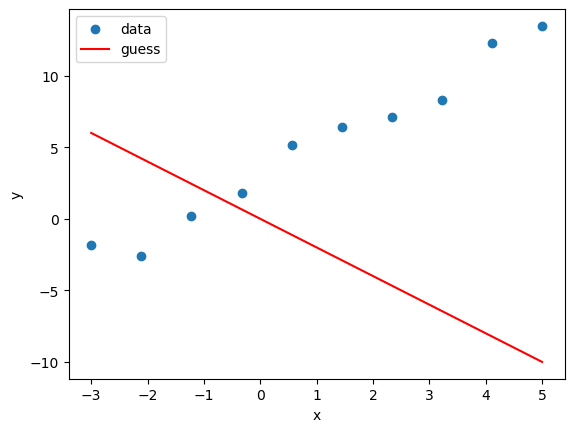

In [5]:
for y_guess in [3 * x + 8, 4* x + 3, -2 * x]:
    plt.scatter(x, y, label="data")
    plt.xlabel("x")
    plt.ylabel("y")

    plt.plot(x, y_guess, c="red", label="guess")
    plt.legend()
    plt.show()

## Mean squared error:

In [6]:
def mse(x, y, y_tilde):
    squared_diffs = (y - y_tilde) ** 2
    return squared_diffs.mean()
    

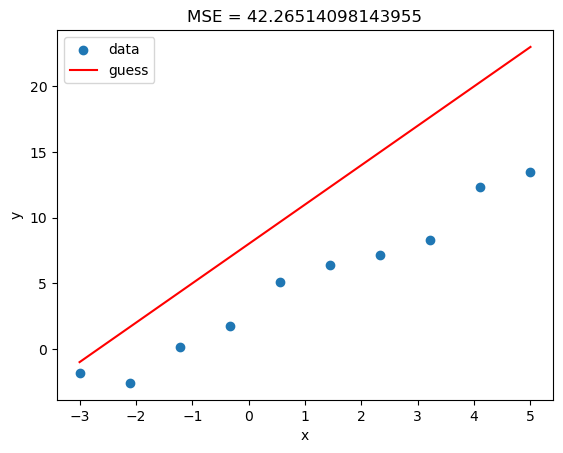

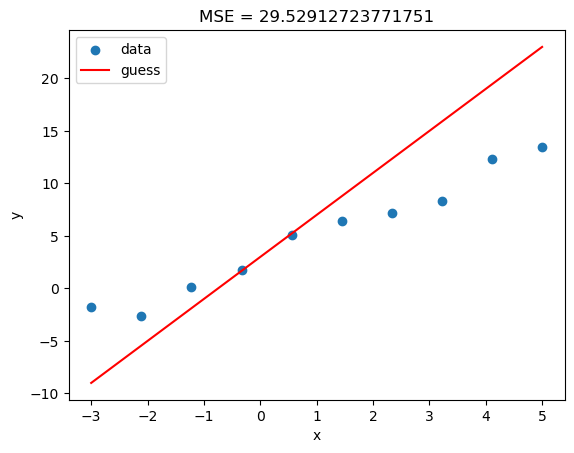

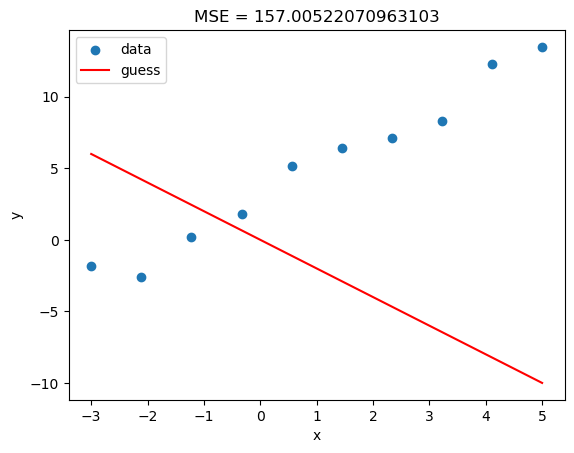

In [7]:
for y_guess in [3 * x + 8, 4* x + 3, -2 * x]:
    plt.scatter(x, y, label="data")
    plt.xlabel("x")
    plt.ylabel("y")

    plt.plot(x, y_guess, c="red", label="guess")
    plt.legend()
    plt.title(f"MSE = {mse(x, y, y_guess)}")
    plt.show()

## Gradient descent

In [8]:
def gradient_descent(x, y, a, b, learning_rate): # or step size
    a_gradient = -2 / len(x) * np.sum(x * (y - (a * x + b)))
    b_gradient = -2 / len(y) * np.sum(y - (a * x + b))
    new_a = a - a_gradient * learning_rate
    new_b = b - b_gradient * learning_rate
    return (new_a, new_b)

In [9]:
def calculate_loss(x, y, a, b):
    y_tilde = a * x + b
    return mse(x, y, y_tilde)

In [10]:
model_a, model_b = -10, 20
alpha = 0.01

for step in range(1001):
    model_a, model_b = gradient_descent(x, y, model_a, model_b, alpha)
    if step % 100 == 0:
        error = calculate_loss(x, y, model_a, model_b)
        print(f"Step: {step}, a = {model_a}, b = {model_b}, J = {error}")
print(f"Final line: {model_a} * x + {model_b}")

Step: 0, a = -8.528845233086983, b = 19.900758925895158, J = 769.8016363703925
Step: 100, a = 1.5573720330760796, b = 6.248363444183065, J = 9.996865151783851
Step: 200, a = 1.957751221694041, b = 3.578446873680409, J = 1.0807118063792704
Step: 300, a = 2.029826574924866, b = 3.0978139822079016, J = 0.7917708534400718
Step: 400, a = 2.0428014314842198, b = 3.011291439549044, J = 0.7824073004535744
Step: 500, a = 2.045137138424105, b = 2.99571582972089, J = 0.7821038608627549
Step: 600, a = 2.0455576075741164, b = 2.992911940537056, J = 0.7820940274602624
Step: 700, a = 2.0456332995640194, b = 2.9924071901842972, J = 0.7820937087945132
Step: 800, a = 2.0456469254800593, b = 2.9923163260659598, J = 0.7820936984676842
Step: 900, a = 2.0456493783893857, b = 2.992299968894622, J = 0.7820936981330283
Step: 1000, a = 2.0456498199570676, b = 2.992297024310346, J = 0.7820936981221835
Final line: 2.0456498199570676 * x + 2.992297024310346


In [11]:
model_a, model_b

(2.0456498199570676, 2.992297024310346)

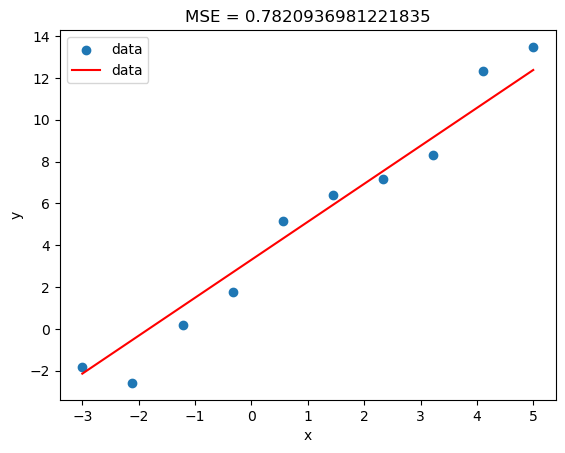

In [12]:

plt.scatter(x, y, label="data")
plt.plot(x, 1.8146809490305444 * x + 3.303814556829465, label="data", c="r")
plt.xlabel("x")
plt.ylabel("y")


plt.legend()
plt.title(f"MSE = {calculate_loss(x, y, model_a, model_b)}")
plt.show()

In [13]:
linear_regression = LinearRegression()
linear_regression.fit(x.reshape(-1, 1), y)

LinearRegression()

In [14]:
linear_regression.coef_, linear_regression.intercept_

(array([2.04564992]), 2.992296377859626)